In [1]:
!git clone https://github.com/cloner174/mr.Sina.git


Cloning into 'mr.Sina'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (143/143), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 143 (delta 37), reused 125 (delta 22), pack-reused 0
Receiving objects: 100% (143/143), 22.50 MiB | 10.93 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [2]:
!git clone https://github.com/cloner174/Multilayer-networks-library.git


Cloning into 'Multilayer-networks-library'...
remote: Enumerating objects: 2217, done.
remote: Counting objects: 100% (862/862), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 2217 (delta 831), reused 829 (delta 829), pack-reused 1355
Receiving objects: 100% (2217/2217), 948.85 KiB | 14.38 MiB/s, done.
Resolving deltas: 100% (1539/1539), done.


In [3]:
!git clone https://github.com/cloner174/Simple-Network.git

Cloning into 'Simple-Network'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (154/154), done.
remote: Total 197 (delta 107), reused 102 (delta 39), pack-reused 0
Receiving objects: 100% (197/197), 212.22 KiB | 4.00 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [ ]:
%cd Simple-Network

In [5]:
from simpleN import MultilayerNetwork, Visualize, MNAnalysis, LinkPrediction, AdvanceLinkPrediction

In [ ]:
%cd ..

In [ ]:
%cd Multilayer-networks-library

In [ ]:
%pip install .

In [ ]:
%cd ..

In [ ]:
%cd mr.Sina

In [ ]:
import numpy as np
import pandas as pd
from main import data
import matplotlib.pyplot as plt

In [ ]:
data_nodes = pd.read_csv('input/nodes.csv')
data_links = pd.read_csv('input/links.csv')

print( type(data_nodes), '\n', data_links.shape )

nodes = dict(data_nodes)
links = dict(data_links)

Start = data.DataHandle( data_links= links, data_nodes= nodes)

advertisers_nodes, publisher_nodes = Start.initial_data( need_nodes = True)

layer_one_links, layer_two_links, interconnected_links = Start.modify_links()

print(len(layer_one_links), '\n', len(layer_two_links), '\n', len(interconnected_links))

print( layer_one_links[470], '\n', layer_two_links[1000], '\n', interconnected_links[10000] )


In [13]:
#     #       #         #         #           #        #             #             #

In [40]:
node_layer_one_map = {}
node_layer_two_map = {}

In [41]:
index_node_layer_one_list = []
index_node_layer_two_list = []

In [42]:
for i in range(len(advertisers_nodes)):

  real_node = advertisers_nodes[i]
  index_node_layer_one_list.append(i)
  node_layer_one_map[real_node] = i

In [43]:
index_node_layer_two_start = len(index_node_layer_one_list) - 1

In [44]:
for i in range(len(publisher_nodes)):
  index_ =  index_node_layer_two_start + i
  real_node = publisher_nodes[i]
  index_node_layer_two_list.append(index_)
  node_layer_two_map[real_node] = index_

In [45]:
layer_one_edges = []
layer_two_edges = []
interconnected_edges = []

In [46]:
for any_ in layer_one_links:

  num = len(layer_one_edges)
  layer_one_edges.append([])
  source = any_[0]
  target = any_[1]
  layer_one_edges[num].append(node_layer_one_map[source])
  layer_one_edges[num].append(node_layer_one_map[target])

In [47]:
for any_ in layer_two_links:

  num = len(layer_two_edges)
  layer_two_edges.append([])
  source = any_[0]
  target = any_[1]
  layer_two_edges[num].append(node_layer_two_map[source])
  layer_two_edges[num].append(node_layer_two_map[target])

In [48]:
for any_ in interconnected_links:

  num = len(interconnected_edges)
  interconnected_edges.append([])
  source = any_[0]
  target = any_[1]
  if source in advertisers_nodes and target in publisher_nodes:
    interconnected_edges[num].append(node_layer_one_map[source])
    interconnected_edges[num].append(node_layer_two_map[target])
  elif source in publisher_nodes and target in advertisers_nodes:
    interconnected_edges[num].append(node_layer_two_map[source])
    interconnected_edges[num].append(node_layer_one_map[target])

In [ ]:
len(interconnected_edges)

In [51]:
sources = []
targets = []
for any_ in interconnected_edges:
  sources.append(any_[0])
  targets.append(any_[1])

In [ ]:
len(sources),len(targets)

In [ ]:
############## Graph Works ! $#################

In [53]:
g= MultilayerNetwork(large_graph=True)

In [54]:
g.add_layer('Advertisers')
g.add_layer('Publishers')

In [55]:
for any_ in index_node_layer_one_list:
  g.add_node(node=any_, layer_name='Advertisers')

In [56]:
for any_ in index_node_layer_two_list:
  g.add_node(node=any_, layer_name='Publishers')

In [57]:
for any_ in layer_one_edges :
  sorc = any_[0]
  targ = any_[1]
  g.add_edge(node1=sorc, node2=targ, layer_name1='Advertisers' , layer_name2='Advertisers', weight = 1)


In [58]:
for any_ in layer_two_edges :
  sorc = any_[0]
  targ = any_[1]
  g.add_edge(node1=sorc, node2=targ, layer_name1='Publishers' , layer_name2='Publishers', weight = 1)


In [59]:
for any_ in interconnected_edges :
  sorc = any_[0]
  targ = any_[1]
  if sorc in index_node_layer_one_list and targ in index_node_layer_two_list:
    g.add_edge(node1=sorc, node2=targ, layer_name1='Advertisers' , layer_name2='Publishers', weight = 1)
  elif sorc in index_node_layer_two_list and targ in index_node_layer_one_list:
    g.add_edge(node1=sorc, node2=targ, layer_name1='Publishers' , layer_name2='Advertisers', weight = 1)


In [66]:
Advertisers_layer_degrees = g.calculate_layer_degrees('Advertisers')
Publishers_layer_degrees = g.calculate_layer_degrees('Publishers')

In [ ]:
len(Advertisers_layer_degrees), len(Publishers_layer_degrees), len(index_node_layer_one_list), len(index_node_layer_two_list)

In [245]:
count_times = {}

In [246]:
for i in range(Advertisers_layer_degrees.shape[0]):
  deg = int(Advertisers_layer_degrees[i,])
  if deg not in count_times.keys() :
    if deg != 0 :
      count_times[deg] = 1
  else:
    if deg != 0 :
      count_times[deg] += 1

In [235]:
for i in range(Publishers_layer_degrees.shape[0]):
  deg = int(Publishers_layer_degrees[i,])
  if deg not in count_times.keys() :
    if deg != 0 :
      count_times[deg] = 1
  else:
    if deg != 0 :
      count_times[deg] += 1

In [260]:
counts = list(count_times.values())

In [261]:
degrees = list(count_times.keys())

In [357]:
x = []
for any_ in degrees:
  x.append([any_, count_times[any_]])

In [288]:
x = np.array(x)

In [ ]:
max(counts)

In [ ]:
#plt.xlim(0, 100)  # Set limits for x-axis
#plt.ylim(1, 150)  # Set limits for y-axis

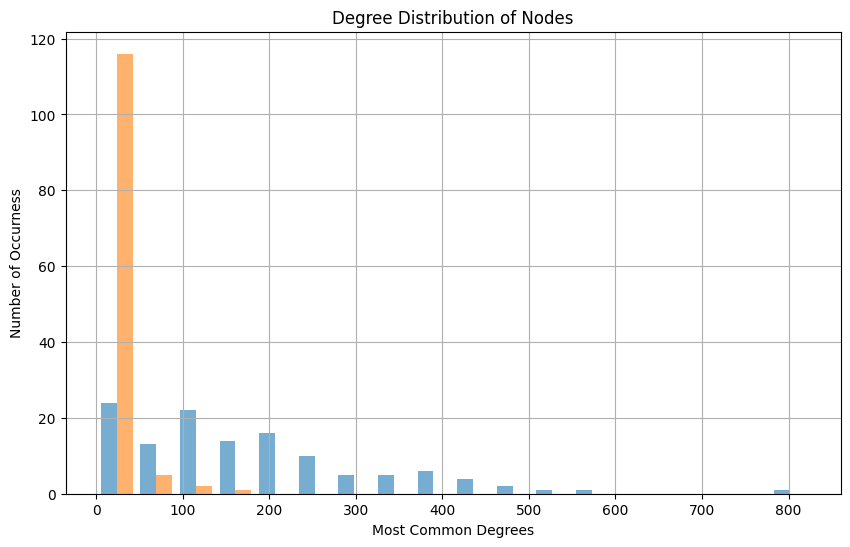

In [297]:
import matplotlib.pyplot as plt
import numpy as np

# Create a plot
plt.figure(figsize=(10, 6))
plt.hist(x, bins = 'auto',alpha=0.6)
plt.title('Degree Distribution of Nodes')
plt.xlabel('Most Common Degrees')
plt.ylabel('Number of Occurness')
plt.grid(True)
plt.show()
# Show the plot
plt.show()

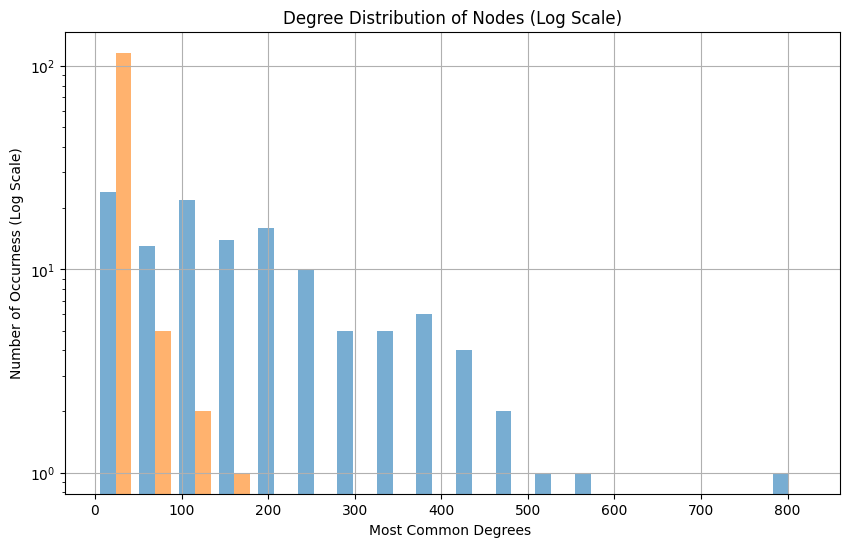

In [312]:
plt.figure(figsize=(10, 6))
plt.hist(x, bins = 'auto',alpha=0.6, log=True)
plt.title('Degree Distribution of Nodes (Log Scale)')
plt.xlabel('Most Common Degrees ')
plt.ylabel('Number of Occurness (Log Scale)')
plt.grid(True)

plt.show()

In [300]:
# That was too much!(969395)! We selected some of the nodes and links base on their likes in R before !!
# Loading that data to avoid long proccess and time !

new_data = pd.read_csv( 'input/link_dataFinal.csv' , index_col=0)
new_data.shape

(199981, 4)

In [ ]:
# Finding the nodes from new_data to pass to the DataHandel class!

new_data.columns

In [301]:
# Getting data ready by turn it into dict !

new_nodes = []

for node in new_data.loc[:,'source'].unique() :
    if node not in new_nodes :
        new_nodes.append(node)

for node in new_data.loc[:,'target'].unique() :
    if node not in new_nodes :
        new_nodes.append(node)

In [ ]:
# Continue getting data ready this time by turnnig to dicts both !

new_links = dict(new_data)
new_nodes = pd.DataFrame(new_nodes)
new_nodes = new_nodes.set_axis(['id'], axis=1)
new_nodes = dict(new_nodes)
print(type(new_nodes), type(new_links))

In [303]:
# This will prepare and preprocess the data :

Start = data.DataHandle( data_links= new_links, data_nodes= new_nodes)

In [ ]:
Start.initial_keys()

In [ ]:
advertiser_campaigns = pd.read_csv( 'input/advertiser_campaigns.csv' , index_col=0)
publisher_contents = pd.read_csv( 'input/publisher_contents.csv' , index_col=0)
print(advertiser_campaigns.columns[13], '\n',publisher_contents.columns[25])

In [306]:
advertisers_nodes = list( advertiser_campaigns['Advertiser ID'].unique() )#It must be list
publishers_nodes = list( publisher_contents['Media App Media - Media → Publisher ID'].unique() )#It must be list

In [307]:
Start.initial_data( advertiser_nodes = advertisers_nodes , publisher_nodes = publishers_nodes )

In [ ]:
new_layer_one_links, new_layer_two_links, new_interconnected_links = Start.modify_links()

In [ ]:
print( len(new_layer_one_links), len(new_layer_two_links), len(new_interconnected_links))

In [316]:
fix_nodes = []
for any_ in new_layer_one_links:
  if any_[0] not in fix_nodes :
    fix_nodes.append(any_[0])
  if any_[1] not in fix_nodes :
    fix_nodes.append(any_[1])

for any_ in new_layer_two_links:
  if any_[0] not in fix_nodes :
    fix_nodes.append(any_[0])
  if any_[1] not in fix_nodes :
    fix_nodes.append(any_[1])

for any_ in new_interconnected_links:
  if any_[0] not in fix_nodes :
    fix_nodes.append(any_[0])
  if any_[1] not in fix_nodes :
    fix_nodes.append(any_[1])

In [ ]:
len(fix_nodes)

In [342]:
G = MultilayerNetwork(large_graph=False)

In [343]:
G.add_layer('Advertisers')
G.add_layer('Publishers')

In [344]:
for any_ in fix_nodes:
  if any_ in advertisers_nodes:
    G.add_node(node = any_,layer_name='Advertisers')
  else:
    G.add_node(node = any_,layer_name='Publishers')

In [ ]:
all_egdes = new_layer_one_links
all_egdes.extend(new_layer_two_links)
all_egdes.extend(new_interconnected_links)

In [345]:
for any_ in all_egdes:


  if any_[0] in advertisers_nodes and any_[1] in publishers_nodes :

    G.add_edge(node1 = any_[0], node2 = any_[1], layer_name1='Advertisers', layer_name2 = 'Publishers', weight = 1)


  elif any_[0] in publishers_nodes and any_[1] in advertisers_nodes :

    G.add_edge(node1 = any_[0], node2 = any_[1], layer_name1='Publishers', layer_name2 = 'Advertisers', weight = 1)


  elif any_[0] in advertisers_nodes and any_[1] in advertisers_nodes :

    G.add_edge(node1 = any_[0], node2 = any_[1], layer_name1='Advertisers', layer_name2 = 'Advertisers', weight = 1)


  elif any_[0] in publishers_nodes and any_[1] in publishers_nodes :

    G.add_edge(node1 = any_[0], node2 = any_[1], layer_name1='Publishers', layer_name2 = 'Publishers', weight = 1)


In [351]:
Visualize(G).show_graph(line_width = 0.5, marker_size = 2.5, space_between_layers = 1.5)

In [352]:
combined_G = MNAnalysis(G).aggregate_network(neet = False)

In [356]:
Visualize(combined_G).show_graph(line_width = 0.5, marker_size = 3, space_between_layers = 1.5)

In [367]:
combined_degrees = combined_G.calculate_layer_degrees('ALL')

In [ ]:
combined_degrees.shape

In [375]:
count_times = {}

In [376]:
for i in range(combined_degrees.shape[0]):
  deg = int(combined_degrees[i,])
  if deg not in count_times.keys() :
    if deg != 0 :
      count_times[deg] = 1
  else:
    if deg != 0 :
      count_times[deg] += 1

In [372]:
degrees = list(count_times.keys())
counts = list(count_times.values())

In [400]:
x = np.array([degrees, counts])

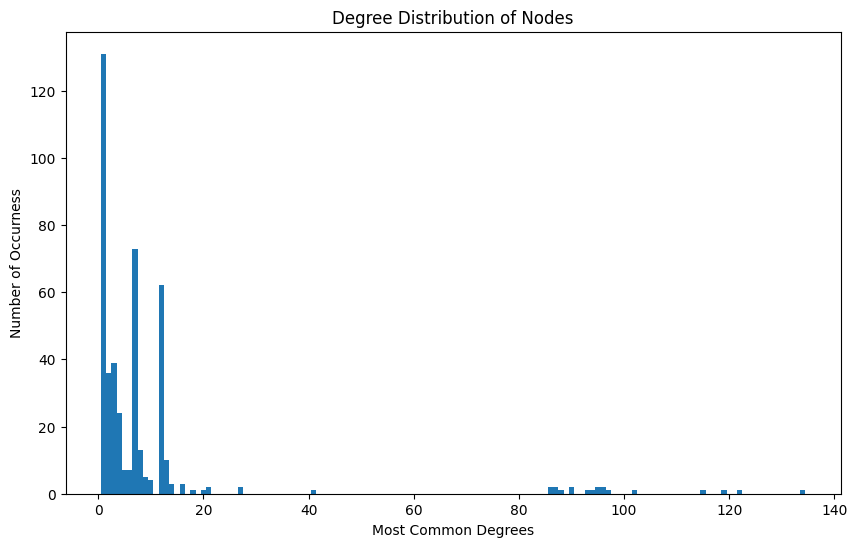

In [391]:
# Create a plot
plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, width=1)
plt.title('Degree Distribution of Nodes')
plt.xlabel('Most Common Degrees')
plt.ylabel('Number of Occurness')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(x, bins = 'auto',alpha=0.6, log=True)
plt.title('Degree Distribution of Nodes (Log Scale)')
plt.xlabel('Most Common Degrees ')
plt.ylabel('Number of Occurness (Log Scale)')
plt.grid(True)

plt.show()

In [418]:
cc = ['black' for i in range(33)]

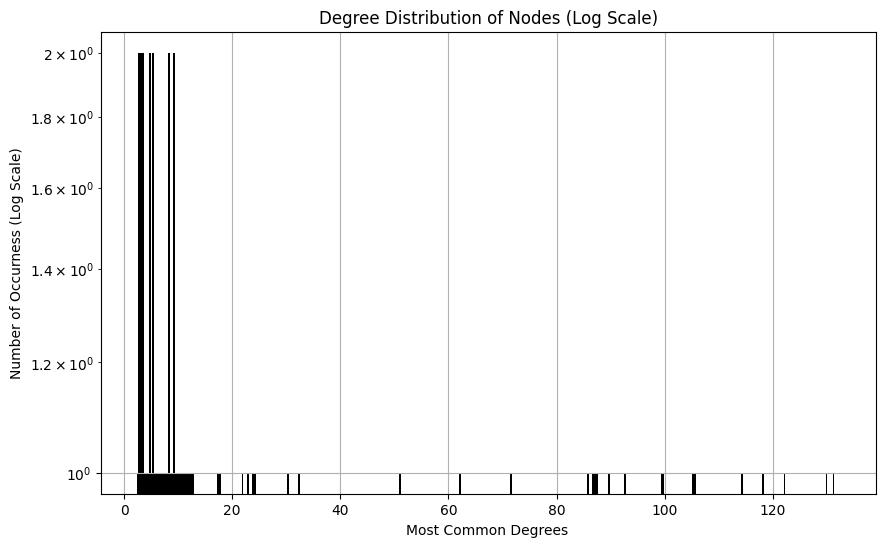

In [419]:
plt.figure(figsize=(10, 6))
plt.hist(x,log=True, color = cc)
plt.title('Degree Distribution of Nodes (Log Scale)')
plt.xlabel('Most Common Degrees ')
plt.ylabel('Number of Occurness (Log Scale)')
plt.grid(True)

plt.show()

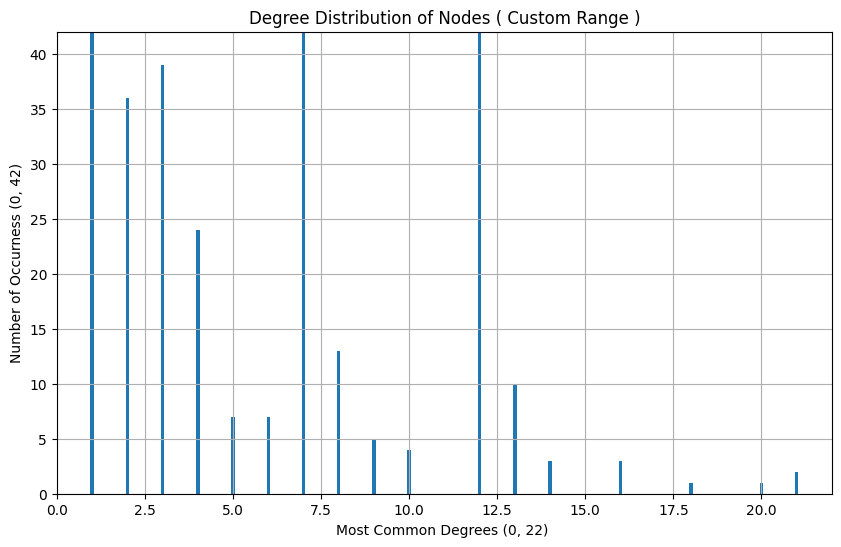

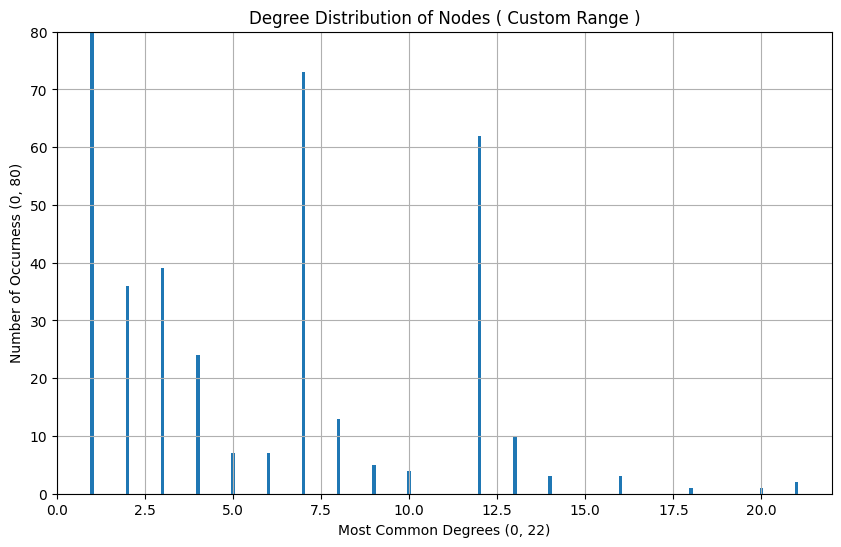

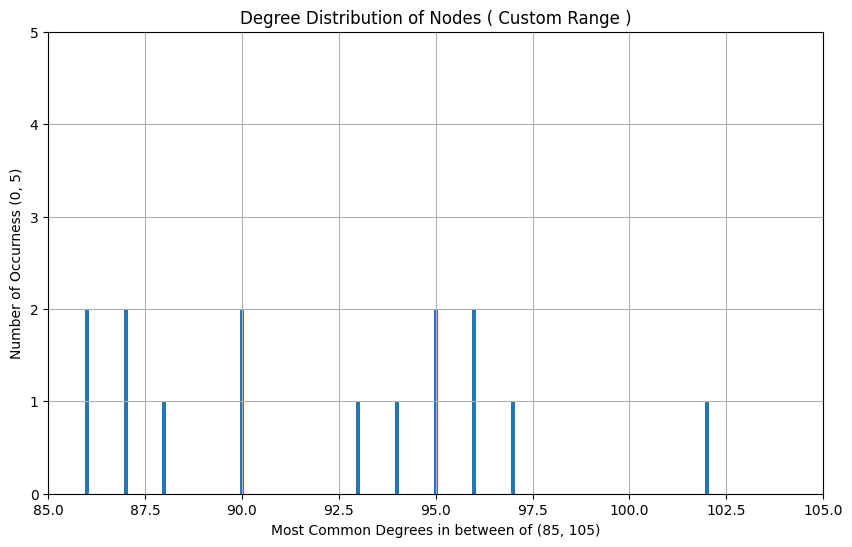

In [396]:
# Custom plot
plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, width=0.1)
plt.title('Degree Distribution of Nodes ( Custom Range )')
plt.xlabel('Most Common Degrees (0, 22) ')
plt.ylabel('Number of Occurness (0, 42)')
plt.grid(True)
plt.xlim(0, 22)  # limits for x
plt.ylim(0, 42)  # limits for y
plt.show()

# Custom plot
plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, width=0.1)
plt.title('Degree Distribution of Nodes ( Custom Range )')
plt.xlabel('Most Common Degrees (0, 22)')
plt.ylabel('Number of Occurness (0, 80)')
plt.grid(True)
plt.xlim(0, 22)  # limits for x
plt.ylim(0, 80)  # limits for y
plt.show()


# Custom plot
plt.figure(figsize=(10, 6))
plt.bar(degrees, counts, width=0.1)
plt.title('Degree Distribution of Nodes ( Custom Range )')
plt.xlabel('Most Common Degrees in between of (85, 105)')
plt.ylabel('Number of Occurness (0, 5)')
plt.grid(True)
plt.xlim(85, 105)  # limits for x
plt.ylim(0, 5)  # limits for y
plt.show()

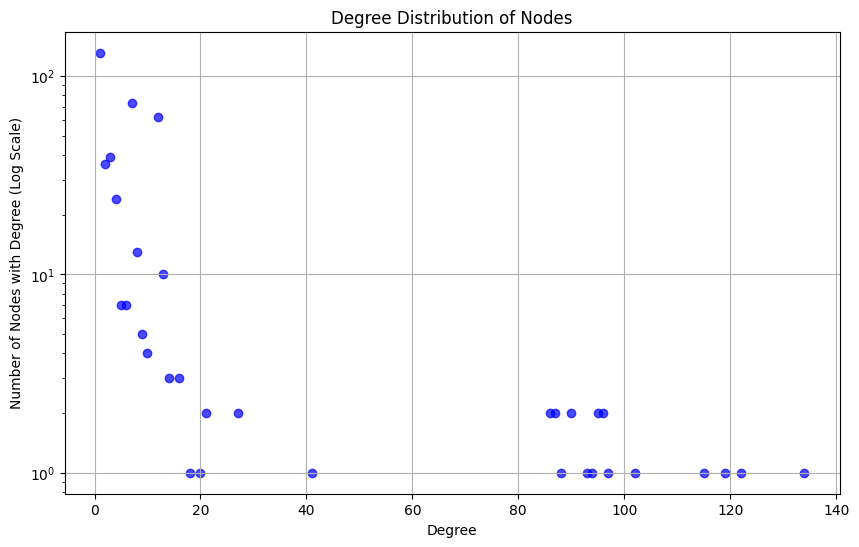

In [425]:
#scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(degrees, counts, color='blue', alpha=0.7)
# logarithmic scale
plt.yscale('log')
plt.title('Degree Distribution of Nodes')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes with Degree (Log Scale)')
plt.grid(True)
plt.show()

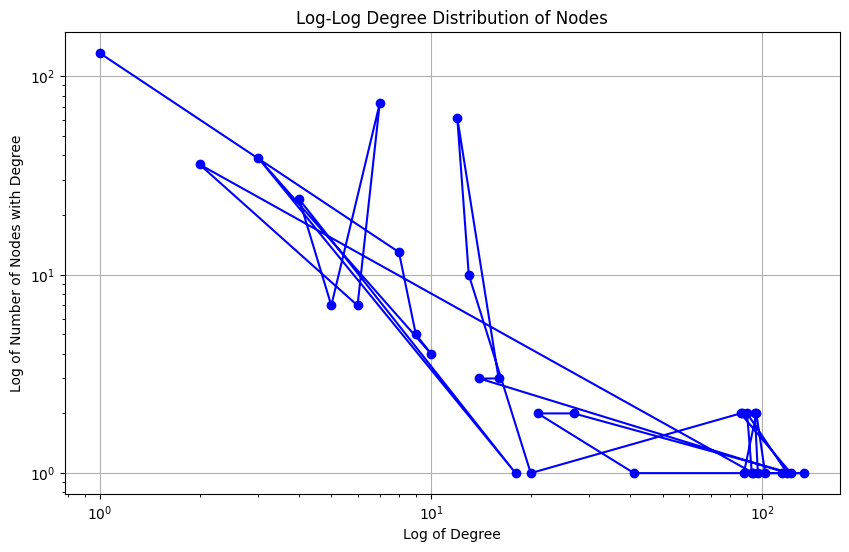

In [426]:
# log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(degrees, counts, marker='o', linestyle='-', color='blue')
plt.title('Log-Log Degree Distribution of Nodes')
plt.xlabel('Log of Degree')
plt.ylabel('Log of Number of Nodes with Degree')
plt.grid(True)
plt.show()

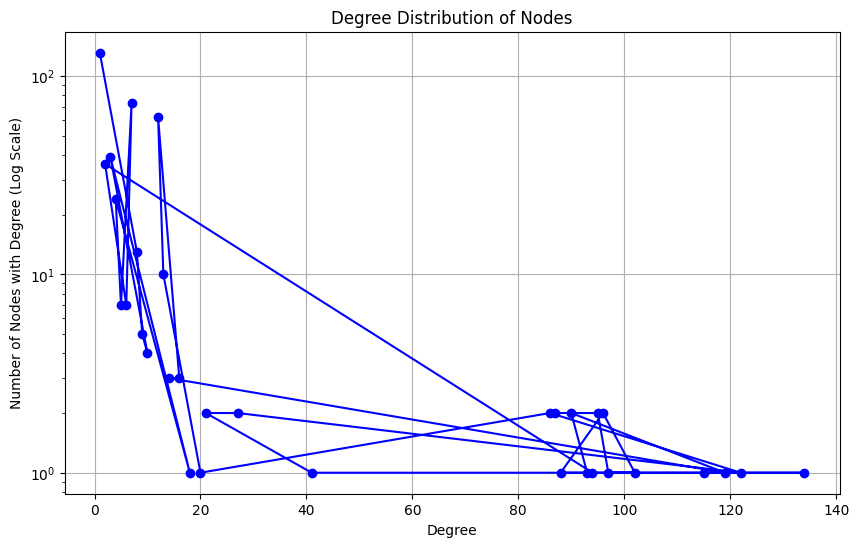

In [427]:
plt.figure(figsize=(10, 6))
plt.plot(degrees, counts, marker='o', linestyle='-', color='blue')
plt.yscale('log')
plt.title('Degree Distribution of Nodes')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes with Degree (Log Scale)')
plt.grid(True)
plt.show()